#CEFET/RJ

**PPCIC - Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

---

**SVM - Support Vector Machine (Máquinas de Vetores de Suporte)**

**Disciplina**: Aprendizado de Máquina

**Professor**: Eduardo Bezerra

**Aluno**: Janio de Souza Lima

#1 Classificação SVM Linear

Função de decisão:

$
w^T.x+b= w_1x_1 + ... + x_nx_n + b
$

Onde:
$b$ é o termo de polarização, $w$ é o vetor de peso das características.

Interpretação do resultado:
* Se o resultado for positivo a classe $\hat{y}$ será prevista como classe positiva (1)
* Caso contrário a classe $\hat{y}$ será prevista como classe negativa (0)

##1.1 Criação e treinamento do modelo

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
#Carga de dataset
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

Nas etapas a seguir é gerado um pipeline para normalização das características e criação de um objeto com o modelo SVM. Em seguida é executado o pipeline que realiza estas etapas.

In [ ]:
#Criação do Pipeline para normalização das características e treinamento do SVM
svm_clf = Pipeline([
                    ('scaler', StandardScaler()),
                    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

O modelo gerado é treinado com os dados carregados anteriormente.

In [ ]:
#Treinamento do modelo
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

##1.2 Aplicação do modelo treinado

Previsão do classificador SVM linear

Equação:

$\hat{y}$ = [0 se $w^T.x+b <0$, 1 se $w^T.x+b\geq0$

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

#2 Classificação SVM Não Linear

##2.1 Mapeamento de features, criação, treinamento e aplicação do modelo

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#Criação de valores entre -4 e 4 (sem separação linear)
x1 = np.linspace(-4, 4, 9).reshape(-1, 1)

#Criando uma segunda característica quadrática
x2 = x1**2

#Conjuntos de dados separado linearmente
X2D = np.c_[x1, x2]

y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
x1_[:,1]

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

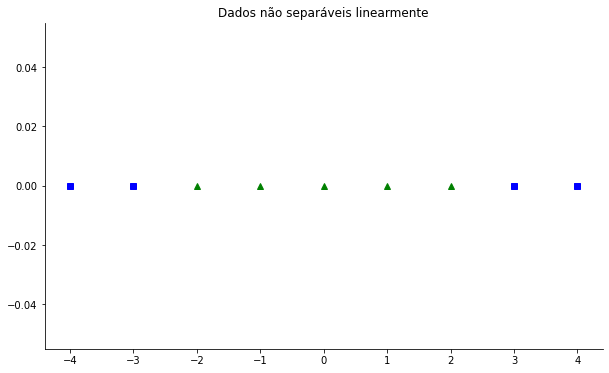

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(x1[:, 0][y==0], np.zeros(4), "bs")
plt.plot(x1[:, 0][y==1], np.zeros(5), "g^")
plt.title('Dados não separáveis linearmente')
sns.despine()

Na visualização acima os dados originais de $x1$ são plotados, mas percebe-se que não há como separá-los linearmente em diferentes classes.

---

A seguir os dados com uma característica correspondente ao quadrado da mesma são plotados, demonstrando a possibilidade de separá-los linearmente.

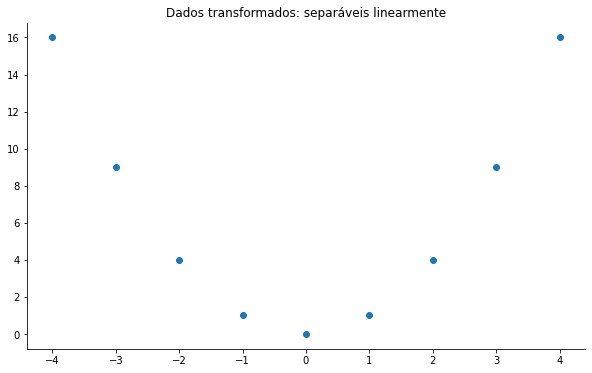

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'o')
plt.title('Dados transformados: separáveis linearmente')
sns.despine()

O gráfico a seguir, transcrito de Géron [2019], demonstra a separação mencionada anteriormente.

(-4.5, 4.5, -1.0, 17.0)

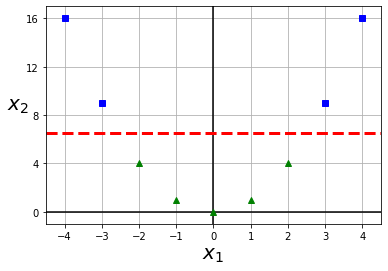

In [ ]:
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

A seguir carregamos o dataset de exemplo `make_moon`, cuja visualização demonstra a impossibilidade de separação linear.

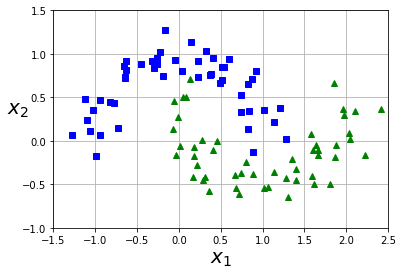

In [ ]:
#Conjunto de dados de exemplo do livro
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Nas etapas seguintes é gerado um pipeline para criação de novas características, baseadas nos polinômios de grau 3, realizada a normalização z-Score e a criação do modelo SVM.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Criação do Pipeline (mapeamento de features, escalonamento e modelo)
polynomial_svm_clf = Pipeline([
                               ('poly_features', PolynomialFeatures(degree=3)),
                               ('scaler', StandardScaler()),
                               ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

Agora o pipeline é executado no conjunto de dados e em seguida realizadas predições cuja plotagem demonstra a classificação realizada.

In [ ]:
#Execução do pipeline
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

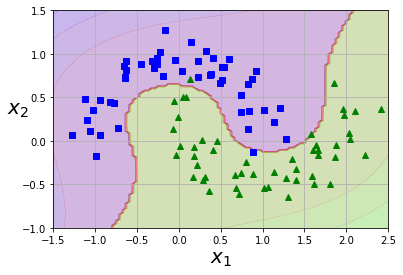

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

##2.2 Uso de Kernels

A abordagem de uso de kernels permite a geração de modelos considerando a adição de novas características com dimensões diferentes, por exemplo polinomiais, sem a necessidade de efetivamente adicioná-las ao conjunto de dados.

Isso ocorre porque com aplicação de funções denominadas *kernels* é possível calcular o produto escalar $\phi(a)^T.\phi(b)$ com base nos vetores originais $a$ e $b$ sem sem precisar calcular a transformação $\phi$.

O que possibilita esta técnica é que a transformação  é igual ao produto escalar dos dados originais: $\phi(a)^T.\phi(b) = (a^T.b)^2$

###2.2.1 Kernel Polinomial

Função do Kernel Polinomial:

$
K(a,b) = (a^T.b)^2
$

---

Aplicação usando Scikit-Learn

In [ ]:
from sklearn.svm import SVC

In [ ]:
#Criação do pipeline para uso do kernel polinomial
poly_kernel_svm_clf = Pipeline([
                                ('scaler', StandardScaler()),
                                ('svm_clf', SVC(kernel='poly',
                                                degree=3,
                                                coef0=1,
                                                C=5))
])

In [ ]:
#Execução do pipeline
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
#Criação de outro pipeline (10 graus e coef = 100)
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0, 0.5, '')

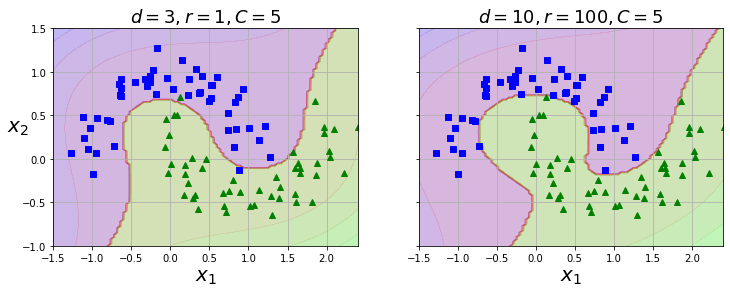

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

###2.2.2 Kernel RBF Gaussiano

Além do *kernel polinomial* visto na subseção anterior, há outras formas de aplicação desta técnica. A partir de agora é apresentada sua aplicação para *kernel gaussiano*.

Função do Kernel RBF Gaussiano:

$
K(a,b) = exp(-y||a-b||^2)
$

---

Aplicação usando Scikit-Learn

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

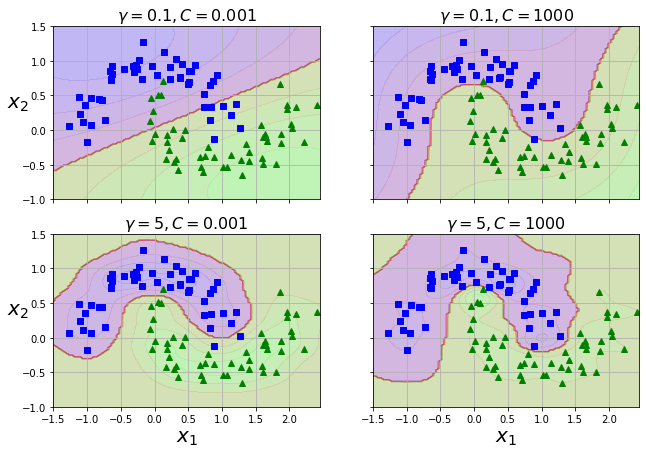

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

#3 Regressão SVM

O algoritmo SVM também pode ser usado para regressão, prevendo valores de $y$, dada uma instância de $x$, ao invés de uma classe.

##3.1 Regressão Linear usando SVM

In [ ]:
#Dados de exemplo
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

Criação e aplicação de predições com o um modelo SVM linear.

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

##3.2 Regressão Polinomial usando SVM

Geração de dados aleatórios com escalonamento quadrático.

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

Criação de um modelo SVM polinomial com técnica de kernel e sua aplicação nos dados acima.

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Criação de dois modelos com mudança nos parâmetros e plotagem dos resultados para comparação.

In [ ]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

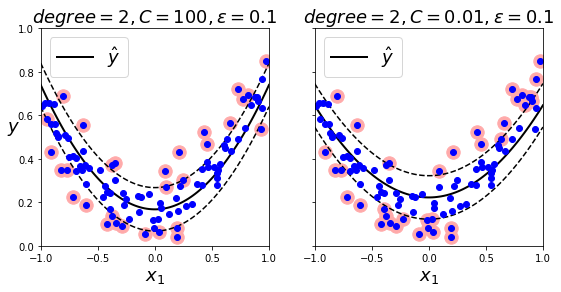

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

A mudança do parâmetro C muda o nível de regularização do modelo (maior C equivale a menor regularização).

#Referências

**Referências**

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.